In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vivarium import Artifact

!date

Wed Oct  1 16:56:25 PDT 2025


In [2]:
!ls -halt united_states_of_america.hdf # expects this to be in root directory of repo

-rw-r--r-- 1 abie abie 43M Oct  1 16:54 united_states_of_america.hdf


In [3]:
%run src/vivarium_csu_alzheimers/data/consistent_rates.py

sample: 100%|██████████| 1000/1000 [06:02<00:00,  2.76it/s, 1023 steps of size 5.09e-03. acc. prob=0.89]


In [4]:
art = Artifact(path='united_states_of_america.hdf')

In [5]:
def art_etl(key):
    data = art.load(key)
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data = data[data.age_end <= 95]
    return data

In [6]:
def age_group_plot(measure, art_old, art_new):
    fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
    for j, sex in enumerate(art_new.sex.unique()):
        for i, art_data in enumerate([art_old, art_new]):
            color = f'C{i}'
            if i == 0:
                linestyle = '--'
                label='Old'
            else:
                linestyle = '-'
                label='New'

            art_plot = art_data.loc[(art_data.sex == sex)]# & (art_data.year_start == art_year)]

            ax[j].fill_between(art_plot.age_start, art_plot['2.5%'], art_plot['97.5%'], alpha=0.2, color=color)
            ax[j].plot(art_plot.age_start, art_plot['mean'], linestyle=linestyle, label=label, color=color, linewidth=3)


        ax[j].text(.5, .95, f"{sex}", va='top', ha='center', transform=ax[j].transAxes)
        ax[j].set_xlabel("Age (years)")

        if j == 0:
            ax[j].set_ylabel(f"{measure}")
        if j == 1:
            ax[j].legend(loc=(1.01, 0))

        plt.subplots_adjust(wspace=0)

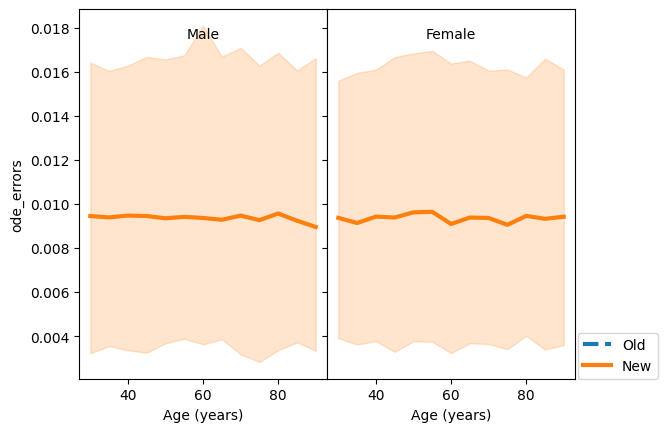

In [7]:
df_new = art_etl('cause.alzheimers_consistent.ode_errors')
df_old = df_new.iloc[[], :]
age_group_plot('ode_errors', df_old, df_new)

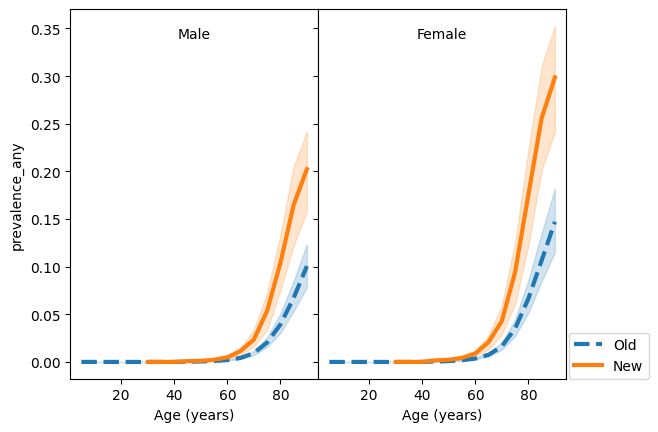

In [8]:
df_old = art_etl('cause.alzheimers.prevalence')
df_new = art_etl('cause.alzheimers_consistent.prevalence_any')
age_group_plot('prevalence_any', df_old, df_new)

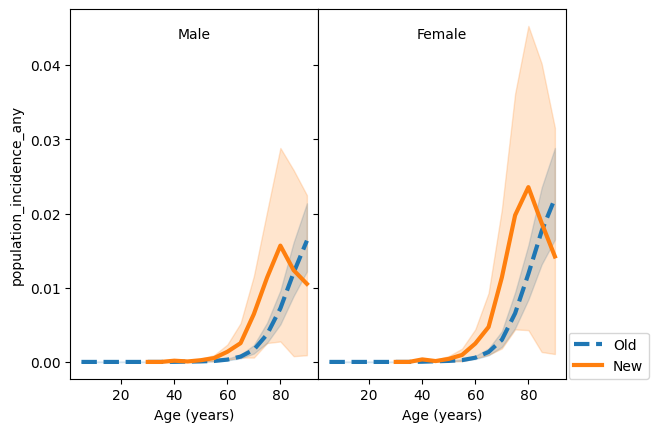

In [9]:
df_old = art_etl('cause.alzheimers.population_incidence_rate')
df_new = art_etl('cause.alzheimers_consistent.population_incidence_any')
age_group_plot('population_incidence_any', df_old, df_new)

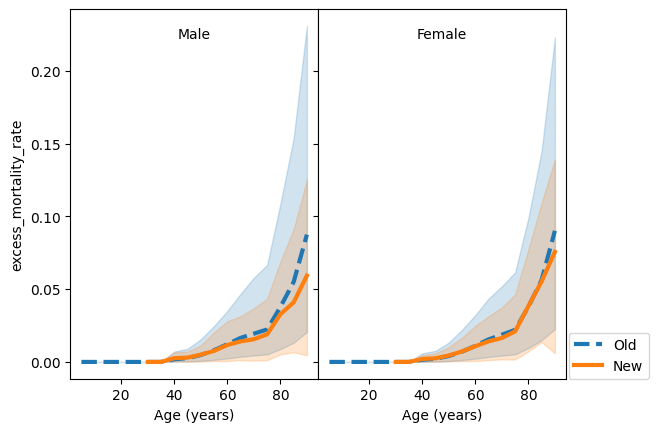

In [10]:
df_old = art_etl('cause.alzheimers_disease_and_other_dementias.excess_mortality_rate')
df_new = art_etl('cause.alzheimers_consistent.excess_mortality_rate')
age_group_plot('excess_mortality_rate', df_old, df_new)

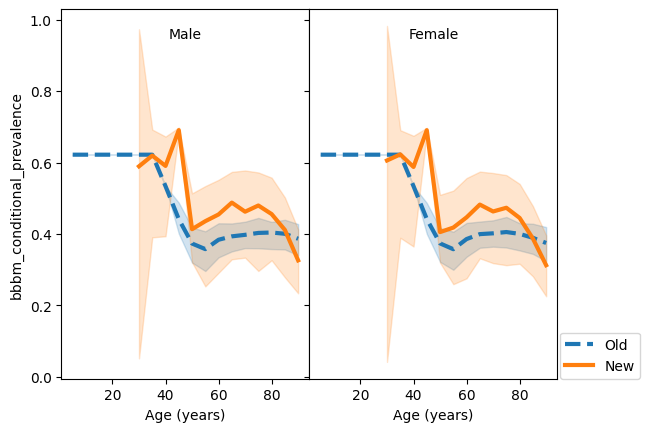

In [11]:
df_old = art_etl('cause.alzheimers.bbbm_conditional_prevalence')
df_new = art_etl('cause.alzheimers_consistent.bbbm_conditional_prevalence')
age_group_plot('bbbm_conditional_prevalence', df_old, df_new)

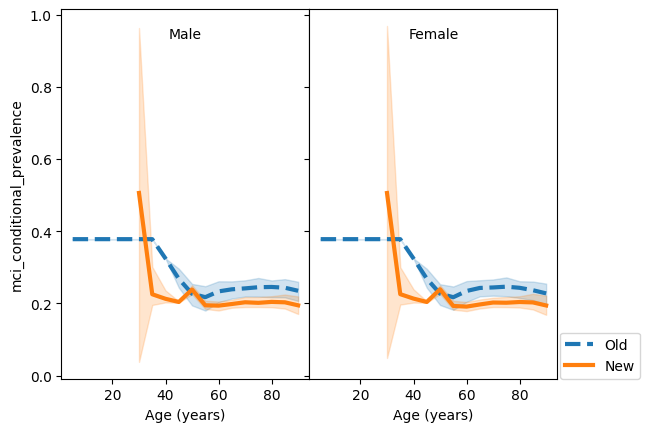

In [12]:
df_old = art_etl('cause.alzheimers.mci_conditional_prevalence')
df_new = art_etl('cause.alzheimers_consistent.mci_conditional_prevalence')
age_group_plot('mci_conditional_prevalence', df_old, df_new)

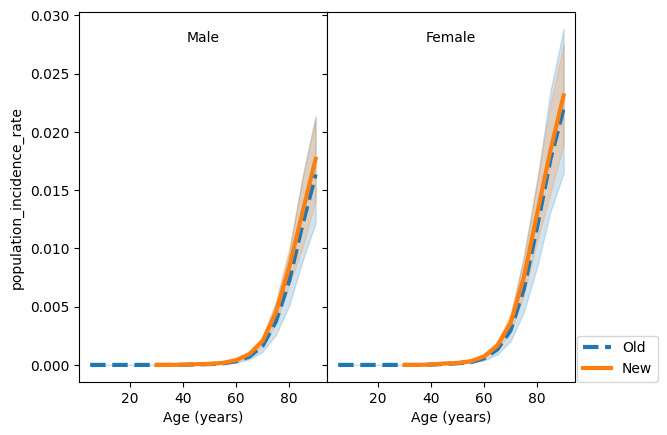

In [13]:
df_old = art_etl('cause.alzheimers.population_incidence_rate')
df_new = art_etl('cause.alzheimers_consistent.population_incidence_dementia')
age_group_plot('population_incidence_rate', df_old, df_new)

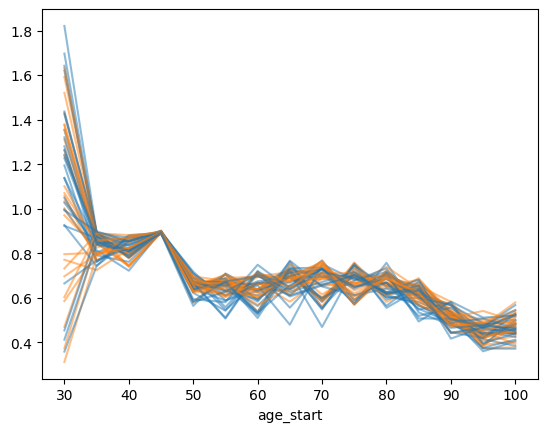

In [14]:
t = art.load('cause.alzheimers_consistent.bbbm_conditional_prevalence') + art.load('cause.alzheimers_consistent.mci_conditional_prevalence')
for col in t.filter(like='draw_').columns[:25]:
    t[col].unstack(level=0).reset_index().set_index('age_start').Male.plot(color='C1', alpha=.5)
    t[col].unstack(level=0).reset_index().set_index('age_start').Female.plot(color='C0', alpha=.5)